In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression


df = pd.read_csv("energy-usage-2010.csv")

In [9]:
df.head(10)

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Albany Park,NaN,NaN,NaN,2220671.0,2109977.0,2078785.0,2080695.0,2582217.0,2881111.0,...,20271.0,7713.0,1.65,66.77,678.87,6822.0,0.8845,4535.0,0.6648,6822.0
1,Albany Park,1.703114e+14,Residential,Multi 7+,11921.0,12145.0,9759.0,11542.0,14348.0,26617.0,...,132.0,64.0,3.00,65.50,2.20,60.0,0.9375,33.0,0.5500,60.0
2,Albany Park,1.703114e+14,Residential,Multi < 7,1233.0,1645.0,994.0,1055.0,1284.0,3527.0,...,132.0,64.0,2.00,86.00,2.20,60.0,0.9375,33.0,0.5500,60.0
3,Albany Park,1.703114e+14,Residential,Single Family,4141.0,3798.0,2939.0,4727.0,5324.0,9676.0,...,132.0,64.0,1.17,14.33,2.20,60.0,0.9375,33.0,0.5500,60.0
4,Albany Park,1.703114e+14,Residential,Multi 7+,1230.0,1333.0,1260.0,1405.0,1699.0,2094.0,...,228.0,79.0,3.00,86.00,3.51,65.0,0.8228,49.0,0.7540,65.0
5,Albany Park,1.703114e+14,Residential,Multi < 7,12977.0,14639.0,12718.0,14973.0,16384.0,32940.0,...,228.0,79.0,2.50,87.69,3.51,65.0,0.8228,49.0,0.7540,65.0
6,Albany Park,1.703114e+14,Commercial,Multi < 7,2878.0,3755.0,4571.0,2984.0,3111.0,4808.0,...,231.0,70.0,1.00,0.00,3.73,62.0,0.8856,49.0,0.7900,62.0
7,Albany Park,1.703114e+14,Residential,Multi 7+,1478.0,1890.0,1364.0,1271.0,1464.0,2118.0,...,231.0,70.0,3.00,92.00,3.73,62.0,0.8856,49.0,0.7900,62.0
8,Albany Park,1.703114e+14,Residential,Multi < 7,4985.0,2636.0,2353.0,4761.0,4391.0,7362.0,...,231.0,70.0,2.20,87.00,3.73,62.0,0.8856,49.0,0.7900,62.0
9,Albany Park,1.703114e+14,Residential,Single Family,4926.0,6413.0,5586.0,5606.0,6271.0,11549.0,...,231.0,70.0,1.00,88.89,3.73,62.0,0.8856,49.0,0.7900,62.0


In [10]:
#Get the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
COMMUNITY AREA NAME                    67051 non-null object
CENSUS BLOCK                           66974 non-null float64
BUILDING TYPE                          66974 non-null object
BUILDING_SUBTYPE                       66974 non-null object
KWH JANUARY 2010                       66180 non-null float64
KWH FEBRUARY 2010                      66180 non-null float64
KWH MARCH 2010                         66180 non-null float64
KWH APRIL 2010                         66180 non-null float64
KWH MAY 2010                           66180 non-null float64
KWH JUNE 2010                          66180 non-null float64
KWH JULY 2010                          66180 non-null float64
KWH AUGUST 2010                        66180 non-null float64
KWH SEPTEMBER 2010                     66180 non-null float64
KWH OCTOBER 2010                       66180 non-null float64
KWH NOVEMBER 2010         

### Data Cleanup

In [11]:
#missing data

missing_data = df.isnull()

In [12]:
missing_data.head(10)

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
missing_data.tail(10)

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
67041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
67049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
67050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.dtypes

COMMUNITY AREA NAME                     object
CENSUS BLOCK                           float64
BUILDING TYPE                           object
BUILDING_SUBTYPE                        object
KWH JANUARY 2010                       float64
KWH FEBRUARY 2010                      float64
KWH MARCH 2010                         float64
KWH APRIL 2010                         float64
KWH MAY 2010                           float64
KWH JUNE 2010                          float64
KWH JULY 2010                          float64
KWH AUGUST 2010                        float64
KWH SEPTEMBER 2010                     float64
KWH OCTOBER 2010                       float64
KWH NOVEMBER 2010                      float64
KWH DECEMBER 2010                      float64
TOTAL KWH                              float64
ELECTRICITY ACCOUNTS                    object
ZERO KWH ACCOUNTS                        int64
THERM JANUARY 2010                     float64
THERM FEBRUARY 2010                    float64
THERM MARCH 2

In [15]:
#dropna

df.dropna(inplace = True)

In [16]:
df.head(10)

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
1,Albany Park,1.703114e+14,Residential,Multi 7+,11921.0,12145.0,9759.0,11542.0,14348.0,26617.0,...,132.0,64.0,3.00,65.50,2.20,60.0,0.9375,33.0,0.550,60.0
3,Albany Park,1.703114e+14,Residential,Single Family,4141.0,3798.0,2939.0,4727.0,5324.0,9676.0,...,132.0,64.0,1.17,14.33,2.20,60.0,0.9375,33.0,0.550,60.0
5,Albany Park,1.703114e+14,Residential,Multi < 7,12977.0,14639.0,12718.0,14973.0,16384.0,32940.0,...,228.0,79.0,2.50,87.69,3.51,65.0,0.8228,49.0,0.754,65.0
8,Albany Park,1.703114e+14,Residential,Multi < 7,4985.0,2636.0,2353.0,4761.0,4391.0,7362.0,...,231.0,70.0,2.20,87.00,3.73,62.0,0.8856,49.0,0.790,62.0
9,Albany Park,1.703114e+14,Residential,Single Family,4926.0,6413.0,5586.0,5606.0,6271.0,11549.0,...,231.0,70.0,1.00,88.89,3.73,62.0,0.8856,49.0,0.790,62.0
10,Albany Park,1.703114e+14,Commercial,Multi 7+,16639.0,23502.0,19587.0,23327.0,26537.0,40725.0,...,456.0,180.0,3.00,81.80,2.73,167.0,0.9278,167.0,1.000,167.0
13,Albany Park,1.703114e+14,Residential,Single Family,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,30.0,1.00,0.00,3.17,23.0,0.7667,23.0,1.000,23.0
16,Albany Park,1.703114e+14,Residential,Multi < 7,7085.0,8150.0,6709.0,7593.0,8658.0,20207.0,...,208.0,68.0,2.42,87.83,3.25,64.0,0.9412,39.0,0.609,64.0
17,Albany Park,1.703114e+14,Residential,Single Family,3384.0,3201.0,2644.0,3236.0,3795.0,8870.0,...,208.0,68.0,1.00,90.67,3.25,64.0,0.9412,39.0,0.609,64.0
18,Albany Park,1.703114e+14,Residential,Multi < 7,12399.0,11624.0,9809.0,11652.0,13127.0,21458.0,...,200.0,58.0,2.40,90.00,3.70,54.0,0.9309,45.0,0.833,54.0


In [17]:
#statistical summary

df.describe()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,...,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000
mean,1.703141e+14,9.029018e+03,9.071388e+03,8.538137e+03,8.404627e+03,1.055940e+04,1.410426e+04,1.579704e+04,1.370600e+04,1.023804e+04,...,85.454298,37.660579,1.727001,75.073613,2.901079,33.262510,0.888389,18.719968,0.471502,33.262510
std,2.734253e+09,7.379044e+04,6.762500e+04,5.733466e+04,5.567833e+04,6.564409e+04,7.410903e+04,9.261221e+04,8.237442e+04,6.578083e+04,...,85.259304,54.831089,1.135246,28.259171,0.837439,48.591219,0.116450,36.283273,0.285204,48.591219
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.043500,0.000000,0.000000,1.000000
25%,1.703116e+14,2.186000e+03,2.524000e+03,2.459000e+03,2.432000e+03,3.008000e+03,4.191000e+03,4.946000e+03,4.288000e+03,3.045000e+03,...,41.000000,16.000000,1.180000,57.500000,2.300000,14.000000,0.842100,3.000000,0.231000,14.000000
50%,1.703141e+14,4.442000e+03,4.844500e+03,4.680500e+03,4.635000e+03,5.801000e+03,8.209000e+03,9.559000e+03,8.091000e+03,5.730500e+03,...,65.000000,25.000000,1.650000,79.630000,2.820000,22.000000,0.917400,10.000000,0.500000,22.000000
75%,1.703166e+14,7.833000e+03,8.075250e+03,7.682250e+03,7.631250e+03,9.813250e+03,1.429600e+04,1.627500e+04,1.353750e+04,9.433250e+03,...,103.000000,41.000000,2.000000,95.330000,3.410000,36.000000,0.971400,21.000000,0.692000,36.000000
max,1.703184e+14,1.013538e+07,9.513220e+06,7.169960e+06,7.137167e+06,8.842112e+06,1.042817e+07,1.525210e+07,1.315616e+07,9.322770e+06,...,1496.000000,1365.000000,50.500000,153.500000,12.000000,1034.000000,1.000000,993.000000,1.000000,1034.000000


In [18]:
#Summary statistics of Area

df['COMMUNITY AREA NAME'].value_counts()


Austin                    1895
West Town                 1758
Belmont Cragin            1393
Portage Park              1356
Lakeview                  1323
Irving Park               1182
Roseland                  1170
West Ridge                1089
Logan Square              1063
Auburn Gresham            1055
Chicago Lawn              1052
Lincoln Park               971
Humboldt Park              949
New City                   938
Dunning                    924
West Englewood             920
Norwood Park               917
West Pullman               916
South Lawndale             900
South Shore                790
Brighton Park              789
Garfield Ridge             774
Greater Grand Crossing     772
Ashburn                    772
South Chicago              765
Albany Park                760
North Center               758
Englewood                  756
Avondale                   718
Lincoln Square             684
                          ... 
Hermosa                    417
Woodlawn

In [19]:
#Energy consumption by area


area_energy = df.groupby(['COMMUNITY AREA NAME']).sum()
area_energy.head()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
COMMUNITY AREA NAME,,,,,,,,,,,,,,,,,,,,,
Albany Park,1.294367e+17,4413629.0,4703615.0,4641399.0,4592074.0,6038654.0,8861076.0,9582424.0,7384675.0,5258257.0,...,82386.0,28224.0,1337.78,60422.87,2378.58,25666.0,696.9465,15779.0,396.5912,25666.0
Archer Heights,4.922124e+16,1730878.0,1414985.0,1238461.0,1496787.0,1767976.0,2446653.0,3347367.0,2983896.0,1794642.0,...,21140.0,6613.0,427.24,18474.82,1004.07,5987.0,261.8884,2596.0,120.1546,5987.0
Armour Square,1.362525e+16,898327.0,927365.0,926225.0,973716.0,1069889.0,1231294.0,1729897.0,1757318.0,1312205.0,...,10043.0,4265.0,162.73,5726.11,211.00,3940.0,73.8458,2671.0,51.1971,3940.0
Ashburn,1.314847e+17,7229298.0,6999456.0,6744633.0,6886125.0,9436685.0,14081884.0,15518659.0,11828442.0,8251765.0,...,43865.0,14268.0,1012.18,39572.05,2460.53,13591.0,736.0963,1880.0,102.0059,13591.0
Auburn Gresham,1.796845e+17,5957826.0,6174134.0,6052004.0,5898367.0,7148767.0,9983668.0,10811724.0,8903491.0,6748615.0,...,68814.0,28057.0,1573.91,79737.84,3077.25,24355.0,929.4914,13016.0,471.3548,24355.0


In [20]:
#Top 15 areas consuming the most kilowatt

area_energy.nlargest(15, 'TOTAL KWH')
highest=area_energy.nlargest(15, 'TOTAL KWH').index
print(highest)
df_highest=df[df['COMMUNITY AREA NAME'].isin(highest)]

Index(['Near North Side', 'Loop', 'Lakeview', 'Lincoln Park', 'West Town',
       'Austin', 'Belmont Cragin', 'Portage Park', 'West Ridge',
       'Near West Side', 'Dunning', 'Ashburn', 'Edgewater', 'Norwood Park',
       'Rogers Park'],
      dtype='object', name='COMMUNITY AREA NAME')


In [21]:
#Top 15 areas consuming the most THERMS

area_energy.nlargest(15, 'TOTAL THERMS')
highest=area_energy.nlargest(15, 'TOTAL THERMS').index
print(highest)
df_higest=df[df['COMMUNITY AREA NAME'].isin(highest)]

Index(['Lakeview', 'Austin', 'West Town', 'Near North Side', 'Lincoln Park',
       'Belmont Cragin', 'Portage Park', 'West Ridge', 'Auburn Gresham',
       'South Shore', 'Edgewater', 'Roseland', 'Irving Park', 'Dunning',
       'Chicago Lawn'],
      dtype='object', name='COMMUNITY AREA NAME')



From the above, for both maximum therm and kwh consumption, 10 areas are similar.

In [22]:
#Top 15 areas consuming the least kilowatt

area_energy.nsmallest(15, 'TOTAL KWH')
smallest=area_energy.nsmallest(15, 'TOTAL KWH').index
print(smallest)
df_smallest=df[df['COMMUNITY AREA NAME'].isin(smallest)]


Index(['Burnside', 'Fuller Park', 'Oakland', 'Riverdale', 'Washington Park',
       'Douglas', 'Armour Square', 'O'Hare', 'East Garfield Park', 'Hegewisch',
       'Archer Heights', 'Calumet Heights', 'McKinley Park', 'Grand Boulevard',
       'Montclare'],
      dtype='object', name='COMMUNITY AREA NAME')


In [23]:
#Top 15 areas consuming the least therms

area_energy.nsmallest(15, 'TOTAL THERMS')
smallest=area_energy.nsmallest(15, 'TOTAL THERMS').index
print(smallest)
df_smallest=df[df['COMMUNITY AREA NAME'].isin(smallest)]


Index(['Burnside', 'Fuller Park', 'Oakland', 'Riverdale', 'Washington Park',
       'Douglas', 'Armour Square', 'O'Hare', 'Hegewisch', 'Grand Boulevard',
       'East Garfield Park', 'Archer Heights', 'Montclare', 'Calumet Heights',
       'McKinley Park'],
      dtype='object', name='COMMUNITY AREA NAME')


14 similar areas between the lowest consuming khw areasand therms. So its ideal to just select one. I will be selecting KWH.

### Countplot summary

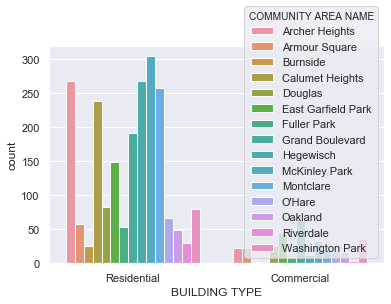

In [35]:
sns.countplot(x='BUILDING TYPE', hue='COMMUNITY AREA NAME', data=df_smallest)


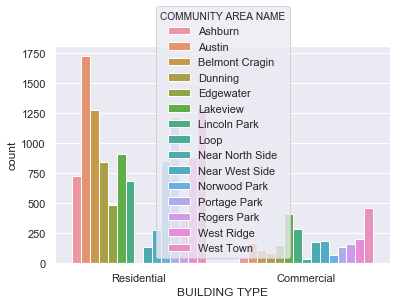

In [49]:

sns.countplot(x='BUILDING TYPE', hue='COMMUNITY AREA NAME', data=df_highest)


#### Barplot

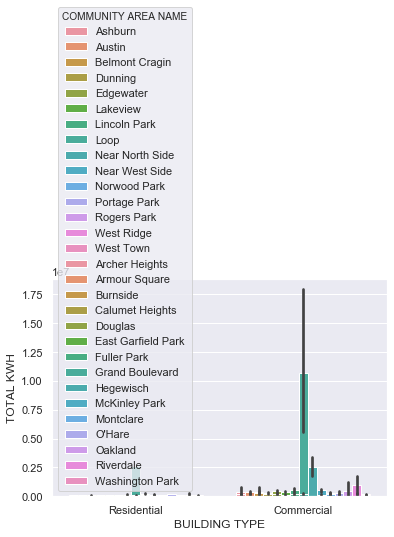

In [56]:
sns.barplot(x=df_highest['BUILDING TYPE'],y=df_highest['TOTAL KWH'],hue=df_highest['COMMUNITY AREA NAME'])
sns.barplot(x='BUILDING TYPE',y='TOTAL KWH',data=df_smallest,hue='COMMUNITY AREA NAME')

From the above graph even though the count for Residential category is more,  the more consumption is been done by Commercial plots for both type of Area.

# Correlation

Correlation between total energy consumption and population

(0, 122584228.20615913)

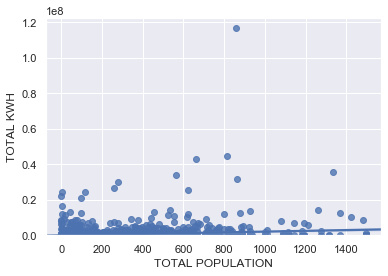

In [62]:
sns.regplot(x='TOTAL POPULATION', y='TOTAL KWH', data=df)
plt.ylim(0,)